In [1]:
import numpy as np
import networkx as nx
import dit
import itertools as it
from ast import literal_eval as fromstr
import matplotlib.pyplot as plt
%matplotlib inline

# Example Worlds

## First, a world with a couple of "essence kinds".

In [105]:
graph1 = nx.DiGraph()

In [106]:
graph1.add_edges_from([(0, 1), (0, 2), (3, 4), (3, 5)])

In [108]:
for node in [0, 3]:
    graph1.node[node]['dist'] = essence_prob
for node in [1, 2, 4, 5]:
    graph1.node[node]['dist'] = noisy_essence

Then we convert this graph to a dit distribution

In [110]:
two_essence_kinds = dit.distribution_from_bayesnet(graph1, sample_space=outcomes)

In [111]:
two_essence_kinds.set_rv_names(['P' + str(n) for n in range(1, 7)])

In [112]:
import pickle as p

In [113]:
with open("two_essence_kinds_pmf.pickle", "wb") as pfile:
    p.dump(two_essence_kinds.pmf, pfile)

This world can be plausibly described as one with two "essence kinds": the one that stems from 0, and the one that stems from 5. If the detectable property corresponds to, e.g., random variable 1, and the payoff relevant property to, e.g., rv 2.

Now, I'll do the same thing but with more children per essence node:

In [45]:
essence_kind1 = nx.star_graph(4)
essence_kind2 = nx.star_graph(4)
two_essence_kinds = nx.disjoint_union(essence_kind1, essence_kind2)

In [46]:
two_essence_directed = two_essence_kinds.to_directed()

In [47]:
for edge in two_essence_directed.edges():
    if edge[0] not in [0, 5]:
        two_essence_directed.remove_edge(*edge)

In [59]:
def noisy_essence(node_val, parent_val):
    cond_distrib = np.array([[.95, .05], [.05, .95]])
    return cond_distrib[fromstr(node_val), fromstr(list(parent_val.values())[0])]

def essence_prob(node_val, parent_val):
    return 0.5

In [60]:
for node in [0, 5]:
    two_essence_directed.node[node]['dist'] = essence_prob
for node in [1, 2, 3, 4, 6, 7, 8, 9]:
    two_essence_directed.node[node]['dist'] = noisy_essence

In [61]:
outcomes = [''.join(outcome) for outcome in it.product('01', repeat=10)]

In [62]:
two_essence_dist = dit.distribution_from_bayesnet(two_essence_directed, sample_space=outcomes)

# The Blahut Algorithm 

Now, we calculate the R(D) curve using Blahut's algorithm.

In [64]:
import blahut as b

In [65]:
import imp

In [66]:
imp.reload(b);

In [ ]:
rdt = b.RDT(two_essence_dist, a=10, b=.01, K=300)

In [115]:
results = rdt.all_points()

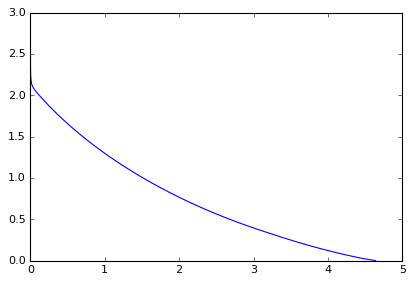

In [116]:
plt.plot(results[1], results[0])

In [79]:
rdt.blahut(0)

(0.031866901282006171, 2.9328817829583187)

Now let's see if results are the same with that other guys's implementation

In [21]:
import blahut_github as bg

In [23]:
rdt.s

array([-2.        , -1.98009967, -1.96039735, -1.94089107, -1.92157888,
       -1.90245885, -1.88352907, -1.86478764, -1.84623269, -1.82786237])

In [29]:
for beta in rdt.s:
    print(bg.BlahutArimato(rdt.dist_matrix, rdt.pmf, beta))

(0.72464005270532028, 0.95257412682243325)
(0.66418680532039243, 0.9378775671660966)
(0.60140063277384848, 0.92101310111609669)
(0.53817086171015616, 0.90224790247393138)
(0.47625021910040172, 0.88194302797904556)
(0.41711718930141867, 0.86051716056811167)
(0.36189695271630651, 0.83840863576436964)
(0.3113396670911206, 0.81604163338743307)
(0.26584450020970762, 0.79380031485530722)
(0.22551316939476776, 0.77201233112060308)


# Bernoulli Source

So, I am not sure whether this actually works. I am going to try one of the channels for which I know the answer, and see if I get the right results

In [27]:
bernoulli = dit.Distribution({'0': 1/2, '1': 1/2})

In [28]:
rdt = b.RDT(bernoulli, b=.1, epsilon=0.000001)

In [70]:
results = rdt.all_points()

In [71]:
results

array([[ 0.04742587,  0.06212243,  0.0789869 ,  0.0977521 ,  0.11805697,
         0.13948284,  0.16159136,  0.18395837,  0.20619969,  0.22798767],
       [ 0.78762565,  0.7388394 ,  0.68728657,  0.63434618,  0.5813495 ,
         0.52947401,  0.47967582,  0.4326616 ,  0.38889357,  0.34861719]])

In [ ]:
dit.shannon.entropy(0.5) - dit.shannon.entropy(0.20619969)

In [39]:
import blahut_github as bg

In [42]:
bg.BlahutArimato?

In [41]:
rdt.s

array([-2.        , -1.98009967, -1.96039735, -1.94089107, -1.92157888,
       -1.90245885, -1.88352907, -1.86478764, -1.84623269, -1.82786237])

In [ ]:
bg.BlahutArimato(rdt.dist_matrix, rdt.pmf, -2)